# Introduction to data manipulation in Python with Pandas and visulization with plotnine 

Over the last few years, Python has gained an immense amount of popularity thanks to its numerous libraries in the field of machine learning, statistical data analysis, and bioinformatics. While a few years ago, it was often necessary to go back to R for performing routine data manipulation and analysis tasks, nowadays, Python alone has a vast ecosystem of libraries for doing just that.

Today, we'll cover two of the most popular libraries for data analysis:
- [pandas](https://pandas.pydata.org/), for reading and manipulation tabular data
- [plotnine](https://plotnine.readthedocs.io/), the Python clone of ggplot2

## 0 - Foreword, working in a jupyter environment

### This is a markdown cell

With some features of the markdown syntax, such as: 

- **bold** `**bold**`
- *italic* `*italic*`
- `inline code` 
```
`inline code`
```
- [links](https://www.google.com/) `[links](https://www.google.com/)`

- Images  
![](https://maximeborry.com/authors/maxime/avatar_hu4dc3c23d5a8c195732bbca11d7ce61be_114670_270x270_fill_lanczos_center_2.png)   
`![](https://maximeborry.com/authors/maxime/avatar_hu4dc3c23d5a8c195732bbca11d7ce61be_114670_270x270_fill_lanczos_center_2.png)`

- Some latex $ y = ax + b$ `$ y = ax + b$`

In [1]:
print("This is a code cell in Python")

This is a code cell in Python


In [2]:
! echo "This is code cell in bash"

This is code cell in bash


In [3]:
%%bash

echo "This a multiline code cell"
echo "in bash"

This a multiline code cell
in bash


## 1 - Loading required libraries

In [4]:
import pandas as pd
import numpy as np
from plotnine import *

In [5]:
pd.__version__

'1.4.3'

In [6]:
np.__version__

'1.23.1'

In [7]:
! conda list | grep plotnine

plotnine                  0.9.0              pyhd8ed1ab_0    conda-forge


## 2 - Foreword on Pandas

### Pandas terminology

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

![](https://pandas.pydata.org/docs/_images/01_table_series.svg)

#### The pandas getting started tutorial: [pandas.pydata.org/docs/getting_started](https://pandas.pydata.org/docs/getting_started/index.html#)

## 3 - Reading data with Pandas

In [8]:
sample_table_url = "https://raw.githubusercontent.com/SPAAM-community/AncientMetagenomeDir/b187df6ebd23dfeb42935fd5020cb615ead3f164/ancientmetagenome-hostassociated/samples/ancientmetagenome-hostassociated_samples.tsv"
library_table_url = "https://raw.githubusercontent.com/SPAAM-community/AncientMetagenomeDir/b187df6ebd23dfeb42935fd5020cb615ead3f164/ancientmetagenome-hostassociated/libraries/ancientmetagenome-hostassociated_libraries.tsv" 

Getting help in Python

In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [10]:
sample_df = pd.read_csv(sample_table_url, sep="\t")
library_df = pd.read_csv(library_table_url, sep="\t")

In [11]:
sample_df.project_name.nunique()

45

In [12]:
library_df.project_name.nunique()

43

### Listing the columns of the sample dataframe

In [13]:
sample_df.columns

Index(['project_name', 'publication_year', 'publication_doi', 'site_name',
       'latitude', 'longitude', 'geo_loc_name', 'sample_name', 'sample_host',
       'sample_age', 'sample_age_doi', 'community_type', 'material', 'archive',
       'archive_project', 'archive_accession'],
      dtype='object')

### Looking at the data type of the sample dataframe

In [14]:
sample_df.dtypes

project_name          object
publication_year       int64
publication_doi       object
site_name             object
latitude             float64
longitude            float64
geo_loc_name          object
sample_name           object
sample_host           object
sample_age             int64
sample_age_doi        object
community_type        object
material              object
archive               object
archive_project       object
archive_accession     object
dtype: object

- `int64` is for integers
- `floating64` is for floting point precision numbers, also known as double in some other languages
- `object` is a general type in pandas for everything that is not a number, interval, categorical, or date

### Let's inspect our data

What is the size of our dataframe ?

In [15]:
sample_df.shape

(1060, 16)

This dataframe has **1060** rows, and **16** columns

Let's look at the first 5 rows

> **Unlike R, Python is a 0 based language, meaning the first element if of index `0`, not `1` like in R** !

In [16]:
sample_df.head()

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
2,Weyrich2017,2017,10.1038/nature21674,Gola Forest,7.657,-10.841,Sierra Leone,Chimp,Pan troglodytes,100,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890499
3,Weyrich2017,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.328,Spain,ElSidron1,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890498
4,Weyrich2017,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.329,Spain,ElSidron2,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890496


Let's look at the last 5 rows

In [17]:
sample_df.tail()

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
1055,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T2,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283094,ERS7283095"
1056,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283096,ERS7283097"
1057,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T9,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283098,ERS7283099"
1058,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"Dom Square, Riga",56.949,24.104,Latvia,TZA3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283100,ERS7283101"
1059,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Peter’s Church, Riga",56.947,24.109,Latvia,TZA4,Homo sapiens,500,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283102,ERS7283103"


Let's randomly inspect 5 rows

In [18]:
sample_df.sample(n=5)

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
898,Farrer2021,2021,10.1038/s41598-021-86100-w,Jewbury,53.962,-1.075,United Kingdom,Jewbury8833,Homo sapiens,800,10.1038/nature21674,oral,dental calculus,SRA,PRJNA688065,SRS7967563
317,Bieker2020,2020,10.1111/1755-0998.13174,"Lansdowne, Delaware County, Pennsylvania",39.900,-75.200,USA,PH-18,Ambrosia artemisiifolia,100,10.1111/1755-0998.12610,plant tissue,leaf,SRA,PRJNA339123,SRS1631717
269,McDonough2018,2018,10.1093/jmammal/gyy080,"Indonesia: Celebes Island, Gimpoe",-2.060,120.370,Indonesia,Strigocuscus celebensis USNM 219469 Claw,Strigocuscus celebensis,100,10.1093/jmammal/gyy080,soft tissue,keratinous claw,SRA,PRJNA438985,SRS3118689
842,FellowsYates2021,2021,10.1073/pnas.2021655118,Cueva del Boquete de Zafarraya,36.951,-4.127,Spain,ZAF001.A,Homo sapiens neanderthalensis,46000,10.1073/pnas.2021655118,oral,dental calculus,ENA,PRJEB34569,ERS3774445
215,Willman2018,2018,10.1371/journal.pone.0196482,Le Mans,48.006,0.199,France,309,Homo sapiens,200,10.1371/journal.pone.0196482,skeletal tissue,tooth,SRA,PRJNA302605,SRS2213347


### Accessing the data by index/columns

The are different way of selecting of subset of a dataframe

Selecting by the row index

In [19]:
# selecting the 10th row, and all columns
sample_df.iloc[9, :]

project_name                    Weyrich2017
publication_year                       2017
publication_doi         10.1038/nature21674
site_name            Stuttgart-Mühlhausen I
latitude                             48.839
longitude                             9.227
geo_loc_name                        Germany
sample_name                        EuroLBK1
sample_host                    Homo sapiens
sample_age                             7400
sample_age_doi          10.1038/nature21674
community_type                         oral
material                    dental calculus
archive                                 SRA
archive_project                 PRJNA685265
archive_accession                SRS7890488
Name: 9, dtype: object

In [20]:
# selecting the 10th to 12th row, and all columns
sample_df.iloc[9:12, :]

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
9,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I,48.839,9.227,Germany,EuroLBK1,Homo sapiens,7400,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890488
10,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I,48.839,9.227,Germany,EuroLBK2,Homo sapiens,7400,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890485
11,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I,48.839,9.227,Germany,EuroLBK3,Homo sapiens,7400,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890490


In [21]:
# selecting the 10th to 12th row, and the first to the 4th column
sample_df.iloc[9:12, 0:4]

,project_name,publication_year,publication_doi,site_name
9,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I
10,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I
11,Weyrich2017,2017,10.1038/nature21674,Stuttgart-Mühlhausen I


In [22]:
# selecting the column site_name
sample_df['site_name']

0                           Dalheim
1                           Dalheim
2                       Gola Forest
3                    El Sidrón Cave
4                    El Sidrón Cave
                   ...             
1055    St. Gertrude’s Church, Riga
1056    St. Gertrude’s Church, Riga
1057    St. Gertrude’s Church, Riga
1058               Dom Square, Riga
1059       St. Peter’s Church, Riga
Name: site_name, Length: 1060, dtype: object

In [23]:
# Also valid, but less preferred
sample_df.site_name

0                           Dalheim
1                           Dalheim
2                       Gola Forest
3                    El Sidrón Cave
4                    El Sidrón Cave
                   ...             
1055    St. Gertrude’s Church, Riga
1056    St. Gertrude’s Church, Riga
1057    St. Gertrude’s Church, Riga
1058               Dom Square, Riga
1059       St. Peter’s Church, Riga
Name: site_name, Length: 1060, dtype: object

In [24]:
sample_df.shape

(1060, 16)

In [25]:
# Removing a row
sample_df.drop(0)

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
2,Weyrich2017,2017,10.1038/nature21674,Gola Forest,7.657,-10.841,Sierra Leone,Chimp,Pan troglodytes,100,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890499
3,Weyrich2017,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.328,Spain,ElSidron1,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890498
4,Weyrich2017,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.329,Spain,ElSidron2,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890496
5,Weyrich2017,2017,10.1038/nature21674,Spy Cave,50.480,4.674,Belgium,Spy1,Homo sapiens neanderthalensis,35800,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T2,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283094,ERS7283095"
1056,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283096,ERS7283097"
1057,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T9,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283098,ERS7283099"
1058,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"Dom Square, Riga",56.949,24.104,Latvia,TZA3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283100,ERS7283101"


In [26]:
# Removing a columm
sample_df.drop('project_name', axis=1)

,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
2,2017,10.1038/nature21674,Gola Forest,7.657,-10.841,Sierra Leone,Chimp,Pan troglodytes,100,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890499
3,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.328,Spain,ElSidron1,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890498
4,2017,10.1038/nature21674,El Sidrón Cave,43.386,-5.329,Spain,ElSidron2,Homo sapiens neanderthalensis,49000,10.1038/nature21674,oral,dental calculus,SRA,PRJNA685265,SRS7890496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T2,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283094,ERS7283095"
1056,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283096,ERS7283097"
1057,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T9,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283098,ERS7283099"
1058,2021,10.1016/j.jasrep.2021.103213,"Dom Square, Riga",56.949,24.104,Latvia,TZA3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,"ERS7283100,ERS7283101"


## 4 - Dealing with missing data 

Checking is some entries if the table have missing data (NA or NaN)

In [27]:
sample_df.isna()

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1056,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# making the sum by row - axis=1
sample_df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1055    0
1056    0
1057    0
1058    0
1059    0
Length: 1060, dtype: int64

Sorting by decreasing order to check which rows have missing values

In [29]:
sample_df.isna().sum(axis=1).sort_values(ascending=False)

800     2
962     2
992     2
801     2
802     2
       ..
362     0
363     0
364     0
365     0
1059    0
Length: 1060, dtype: int64

In [30]:
sample_df.iloc[800,:]

project_name                         FellowsYates2021
publication_year                                 2021
publication_doi               10.1073/pnas.2021655118
site_name                               Not specified
latitude                                          NaN
longitude                                         NaN
geo_loc_name         Democratic Republic of the Congo
sample_name                                  GDC002.A
sample_host                   Gorilla gorilla gorilla
sample_age                                        200
sample_age_doi                10.1073/pnas.2021655118
community_type                                   oral
material                              dental calculus
archive                                           ENA
archive_project                            PRJEB34569
archive_accession                          ERS3774403
Name: 800, dtype: object

What do do now ? The ideal scenario, correct or impute the data. Here, we're just going to ignore it, and deal with it later

## 5 - Computing basic statistics

TLDR: use the `describe()` function, the equivalent of `summarize` in R

In [31]:
sample_df.describe()

,publication_year,latitude,longitude,sample_age
count,1060.000000,1021.000000,1021.000000,1060.000000
mean,2019.377358,40.600493,3.749624,3588.443396
std,1.633877,18.469421,43.790316,9862.416855
min,2014.000000,-34.030000,-121.800000,100.000000
25%,2018.000000,29.240000,-1.257000,200.000000
50%,2020.000000,45.450000,14.381000,1000.000000
75%,2021.000000,52.699000,23.892000,2200.000000
max,2021.000000,79.000000,159.346000,102000.000000


Let's look at various individual summary statistics
We can run them on the whole dataframe (for `int` or `float` columns), or on a subset of columns

In [32]:
sample_df.mean()

/var/folders/1c/l1qb09f15jddsh65f6xv1n_r0000gp/T/ipykernel_49003/2260452167.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


publication_year    2019.377358
latitude              40.600493
longitude              3.749624
sample_age          3588.443396
dtype: float64

In [33]:
# The average publication year
sample_df['publication_year'].mean()

2019.377358490566

In [34]:
# The median publication year
sample_df['publication_year'].median()

2020.0

In [35]:
# The minimum, or oldest publication year
sample_df['publication_year'].min()

2014

In [36]:
# The maximum, or most recent publication year
sample_df['publication_year'].max()

2021

In [37]:
# The number of sites
sample_df['site_name'].nunique()

246

In [38]:
# The number of samples from the different hosts
sample_df['sample_host'].value_counts()

Homo sapiens                      741
Ursus arctos                       85
Ambrosia artemisiifolia            46
Arabidopsis thaliana               34
Homo sapiens neanderthalensis      32
Pan troglodytes schweinfurthii     26
Gorilla beringei beringei          15
Canis lupus                        12
Gorilla gorilla gorilla             8
Mammuthus primigenius               8
Pan troglodytes verus               7
Rangifer tarandus                   6
Gorilla beringei graueri            6
Pan troglodytes ellioti             6
Papio hamadryas                     5
Alouatta palliata                   5
Conepatus chinga                    4
Gerbilliscus boehmi                 4
Strigocuscus celebensis             4
Papio anubis                        2
Gorilla beringei                    2
Papio sp.                           1
Pan troglodytes                     1
Name: sample_host, dtype: int64

In [39]:
# The quantile of the publication years
sample_df['publication_year'].quantile(np.arange(0,1,0.1))

0.0    2014.0
0.1    2017.0
0.2    2018.0
0.3    2018.0
0.4    2020.0
0.5    2020.0
0.6    2020.0
0.7    2021.0
0.8    2021.0
0.9    2021.0
Name: publication_year, dtype: float64

<AxesSubplot:ylabel='Frequency'>

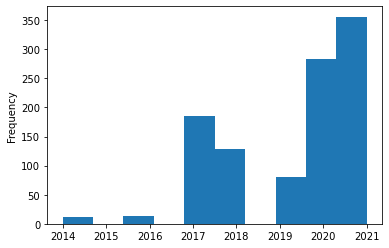

In [40]:
# We can also visualize it with built-in plot functions of pandas
sample_df['publication_year'].plot.hist()

## 6 - Filtering

There are different ways of filtering data with Pandas: 
- The **classic** method with bracket indexing/subsetting
- The `query()` method

The classic method

In [41]:
# Getting all the publications before 2015
sample_df[sample_df['publication_year']  < 2015 ]

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
272,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP4,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428959
273,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP10,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428961
274,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP18,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428962
275,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP37,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428963
276,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP9,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428960
277,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP48,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428964
278,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,"TP02,TP10,TP15,TP26",Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428958
279,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,"TP32,TP42,TP45,TP48",Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428972


In [42]:
# Getting all the publications before 2015, only the Northern hemisphere
sample_df[(sample_df['publication_year']  < 2015) & (sample_df['longitude'] > 0)]

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
500,Appelt2014,2014,10.1128/AEM.03242-13,"Place d'Armes, Namur",50.460,4.86,Belgium,4.453,Homo sapiens,600,10.1128/AEM.03242-13,gut,palaeofaeces,SRA,PRJNA230469,SRS510175


This syntax can rapidly become quite cumbersome, which is why we can also use the `query()` method

In [43]:
# Getting all the publications before 2015
sample_df.query("publication_year < 2015")

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
272,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP4,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428959
273,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP10,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428961
274,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP18,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428962
275,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP37,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428963
276,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP9,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428960
277,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,TP48,Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428964
278,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,"TP02,TP10,TP15,TP26",Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428958
279,Campana2014,2014,10.1186/1756-0500-7-111,Teposcolula Yucundaa,17.490,-97.46,Mexico,"TP32,TP42,TP45,TP48",Homo sapiens,400,10.7183/1045-6635.23.4.467,skeletal tissue,bone,SRA,PRJNA205039,SRS428972


In [44]:
# Getting all the publications before 2015, only the Northern hemisphere
sample_df.query("publication_year < 2015 and longitude > 0 ")

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473742,SRS473743,SRS473744,SRS473745"
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,"SRS473747,SRS473746,SRS473748,SRS473749,SRS473750"
500,Appelt2014,2014,10.1128/AEM.03242-13,"Place d'Armes, Namur",50.460,4.86,Belgium,4.453,Homo sapiens,600,10.1128/AEM.03242-13,gut,palaeofaeces,SRA,PRJNA230469,SRS510175


## 7 - GroupBy operations, and computing statistics on grouped values

The "groupBy" operation, as the name suggests, allows us to group values by a grouping key, and perform a groupwise operation.  
For example, we can group by the `sample_host` and get the age of the **youngest** sample in each group

In [45]:
sample_df.groupby("sample_host")['sample_age'].min()

sample_host
Alouatta palliata                   200
Ambrosia artemisiifolia             100
Arabidopsis thaliana                100
Canis lupus                         400
Conepatus chinga                    100
Gerbilliscus boehmi                 100
Gorilla beringei                    100
Gorilla beringei beringei           200
Gorilla beringei graueri            200
Gorilla gorilla gorilla             200
Homo sapiens                        100
Homo sapiens neanderthalensis     35800
Mammuthus primigenius             41800
Pan troglodytes                     100
Pan troglodytes ellioti             200
Pan troglodytes schweinfurthii      100
Pan troglodytes verus               200
Papio anubis                        100
Papio hamadryas                     100
Papio sp.                           100
Rangifer tarandus                   100
Strigocuscus celebensis             100
Ursus arctos                        100
Name: sample_age, dtype: int64

Here `min()` is a so-called aggregation function

![](img/groupby.png)

Notice that `.value_counts()` is actually a special case of `.groupby()` 

In [46]:
sample_df.groupby("sample_host")["sample_host"].count()

sample_host
Alouatta palliata                   5
Ambrosia artemisiifolia            46
Arabidopsis thaliana               34
Canis lupus                        12
Conepatus chinga                    4
Gerbilliscus boehmi                 4
Gorilla beringei                    2
Gorilla beringei beringei          15
Gorilla beringei graueri            6
Gorilla gorilla gorilla             8
Homo sapiens                      741
Homo sapiens neanderthalensis      32
Mammuthus primigenius               8
Pan troglodytes                     1
Pan troglodytes ellioti             6
Pan troglodytes schweinfurthii     26
Pan troglodytes verus               7
Papio anubis                        2
Papio hamadryas                     5
Papio sp.                           1
Rangifer tarandus                   6
Strigocuscus celebensis             4
Ursus arctos                       85
Name: sample_host, dtype: int64

## 8 - Reshaping data, from wide to long and back

<img src="https://www.researchgate.net/publication/332048735/figure/fig1/AS:741418188406792@1553779279709/The-wide-versus-tidy-data-format-In-the-wide-spreadsheet-like-data-format-each-column.png" width="600">

The tidy format, or long format idea is that one column = one data type. 
Unfortunately for this tutorial, the AncientMetagenomeDir tables are already in the tidy format (good), so we'll see an example or the wide format just below

In [47]:
wide_df = pd.DataFrame(
    [
    [150,155,157,160],
    [149,153,154,155]
    ]
    , index = ['John','Jack']
    , columns = [1991,1992,1993, 1994]
).rename_axis('individual').reset_index()
wide_df

,individual,1991,1992,1993,1994
0,John,150,155,157,160
1,Jack,149,153,154,155


In this hypothetic dataframe, we have the years as column, the individual as index, and their height as value.  
We'll reformat to the tidy/long format using the `.melt()` function

In [48]:

tidy_df = wide_df.melt(id_vars='individual', var_name='year', value_name='height')
tidy_df

,individual,year,height
0,John,1991,150
1,Jack,1991,149
2,John,1992,155
3,Jack,1992,153
4,John,1993,157
5,Jack,1993,154
6,John,1994,160
7,Jack,1994,155


And back to wide format using the `.pivot()` function.

In [49]:
tidy_df.pivot(index='individual', columns='year', values='height')

/Users/maxime/mambaforge/envs/intro-data/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


year,1991,1992,1993,1994
individual,,,,
Jack,149,153,154,155
John,150,155,157,160


## 9 - Joining two different tables

In AncientMetagenomeDir, the information about each sample is located in sample table, and about the library in the library table.  
To match these two together, we need to join the tables together.

To do so, we need a column in common between the two tables, the so-called **joining key** (this key can be the index)

![](https://pandas.pydata.org/docs/_images/08_merge_left.svg)

For the samples and libraries dataframe, the joining key is 

In [50]:
sample_df.columns

Index(['project_name', 'publication_year', 'publication_doi', 'site_name',
       'latitude', 'longitude', 'geo_loc_name', 'sample_name', 'sample_host',
       'sample_age', 'sample_age_doi', 'community_type', 'material', 'archive',
       'archive_project', 'archive_accession'],
      dtype='object')

In [51]:
library_df.columns

Index(['project_name', 'publication_year', 'data_publication_doi',
       'sample_name', 'archive', 'archive_project', 'archive_sample_accession',
       'library_name', 'strand_type', 'library_polymerase',
       'library_treatment', 'library_concentration', 'instrument_model',
       'library_layout', 'library_strategy', 'read_count',
       'archive_data_accession', 'download_links', 'download_md5s',
       'download_sizes'],
      dtype='object')

In [52]:
sample_df.merge(library_df, on='sample_name').columns

Index(['project_name_x', 'publication_year_x', 'publication_doi', 'site_name',
       'latitude', 'longitude', 'geo_loc_name', 'sample_name', 'sample_host',
       'sample_age', 'sample_age_doi', 'community_type', 'material',
       'archive_x', 'archive_project_x', 'archive_accession', 'project_name_y',
       'publication_year_y', 'data_publication_doi', 'archive_y',
       'archive_project_y', 'archive_sample_accession', 'library_name',
       'strand_type', 'library_polymerase', 'library_treatment',
       'library_concentration', 'instrument_model', 'library_layout',
       'library_strategy', 'read_count', 'archive_data_accession',
       'download_links', 'download_md5s', 'download_sizes'],
      dtype='object')

In [53]:
merged_df = sample_df.merge(library_df.drop(['project_name', 'publication_year', 'archive_project', 'archive'], axis=1), on='sample_name')
merged_df

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,...,library_treatment,library_concentration,instrument_model,library_layout,library_strategy,read_count,archive_data_accession,download_links,download_md5s,download_sizes
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,...,none,NaN,Illumina HiSeq 2000,SINGLE,WGS,13228381,SRR957738,ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957738/...,9c40c43b5d455e760ae8db924347f0b2,953396663
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,...,none,NaN,Illumina HiSeq 2000,SINGLE,WGS,13260566,SRR957739,ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957739/...,dec1507f742de109529638bf00e0732f,1026825795
2,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,...,none,NaN,Illumina HiSeq 2000,SINGLE,WGS,8869866,SRR957740,ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957740/...,bc49c59f489b4009206f8abcb737d55d,661500786
3,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,B61,Homo sapiens,900,...,none,NaN,Illumina HiSeq 2000,SINGLE,WGS,11275013,SRR957741,ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957741/...,e02e3549ddd3ba6dc278a7f573c07321,877360302
4,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.84,Germany,G12,Homo sapiens,900,...,none,NaN,Illumina HiSeq 2000,SINGLE,WGS,8978974,SRR957742,ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957742/...,b7c620b8ee165c08bee204529341ca5b,690614774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,Maixner2021,2021,10.1016/j.cub.2021.09.031,"Edlersbergwerk - oben, Hallstatt",47.560,13.63,Austria,2612,Homo sapiens,150,...,none,NaN,Illumina MiSeq,PAIRED,WGS,1858404,ERR5766179,ftp.sra.ebi.ac.uk/vol1/fastq/ERR576/009/ERR576...,542787c645b0aeebe15c66cc926d3f69;0bc58d56be3c3...,86783041;98100690
1803,Maixner2021,2021,10.1016/j.cub.2021.09.031,"Edlersbergwerk - oben, Hallstatt",47.560,13.63,Austria,2612,Homo sapiens,150,...,none,NaN,Illumina MiSeq,PAIRED,WGS,1603064,ERR5766180,ftp.sra.ebi.ac.uk/vol1/fastq/ERR576/000/ERR576...,022bb28da460e66590e974b4135bdd2e;f88acec67b648...,74375931;77621627
1804,Maixner2021,2021,10.1016/j.cub.2021.09.031,"Edlersbergwerk - oben, Hallstatt",47.560,13.63,Austria,2612,Homo sapiens,150,...,none,NaN,Illumina MiSeq,PAIRED,WGS,1075088,ERR5766181,ftp.sra.ebi.ac.uk/vol1/fastq/ERR576/001/ERR576...,57fc575d32db14f1d5c1ed7f6a106e91;4f57b9d978b53...,51852071;56288763
1805,Maixner2021,2021,10.1016/j.cub.2021.09.031,"Edlersbergwerk - oben, Hallstatt",47.560,13.63,Austria,2612,Homo sapiens,150,...,none,NaN,Illumina HiSeq 2500,PAIRED,WGS,138836358,ERR5766182,ftp.sra.ebi.ac.uk/vol1/fastq/ERR576/002/ERR576...,64e63df8da7542957d1d9eb08e764d38;3fc6cba02c74d...,4332353625;4420486328


## 10 - Visualizing some of the results with Plotnine

Plotnine is the Python clone of ggplot2, the syntax is identical, which makes it great if you're working with data in tidy/long format, and are already familiar with the ggplot2 syntax

/Users/maxime/mambaforge/envs/intro-data/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


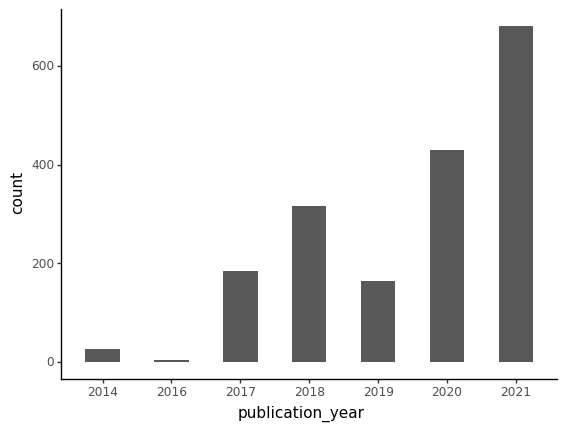

<ggplot: (369544015)>

In [61]:
ggplot(merged_df, aes(x='publication_year')) + geom_histogram() + theme_classic()

We can start to ask some questions, for example, is the sequencing depth increasing with the years ?

In [55]:
merged_df.dtypes

project_name                 object
publication_year              int64
publication_doi              object
site_name                    object
latitude                    float64
longitude                   float64
geo_loc_name                 object
sample_name                  object
sample_host                  object
sample_age                    int64
sample_age_doi               object
community_type               object
material                     object
archive                      object
archive_project              object
archive_accession            object
data_publication_doi         object
archive_sample_accession     object
library_name                 object
strand_type                  object
library_polymerase           object
library_treatment            object
library_concentration       float64
instrument_model             object
library_layout               object
library_strategy             object
read_count                    int64
archive_data_accession      

In [56]:
merged_df['publication_year'] = merged_df['publication_year'].astype('category')

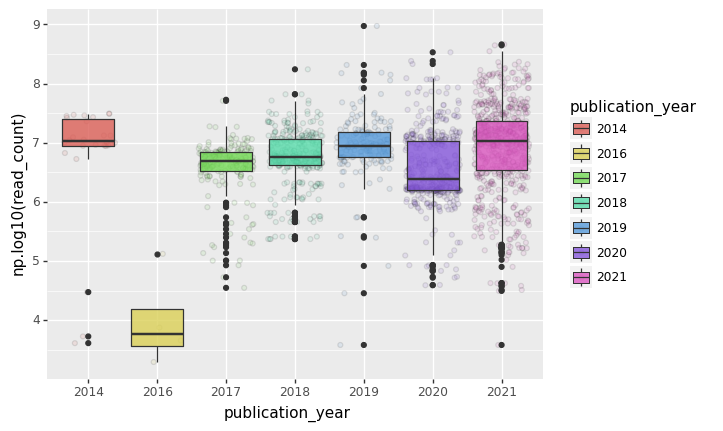

<ggplot: (369349593)>

In [57]:
ggplot(merged_df, aes(x='publication_year', y='np.log10(read_count)', fill='publication_year')) + geom_jitter(alpha=0.1) + geom_boxplot(alpha=0.8)

We could ask the same question, but first grouping the samples by publication year

In [58]:
avg_read_count_by_year = merged_df.groupby('publication_year')['read_count'].mean().to_frame().reset_index()
avg_read_count_by_year

,publication_year,read_count
0,2014,1.437173e+07
1,2016,3.653450e+04
2,2017,5.712598e+06
3,2018,9.273287e+06
4,2019,2.211632e+07
5,2020,1.111819e+07
6,2021,2.547655e+07


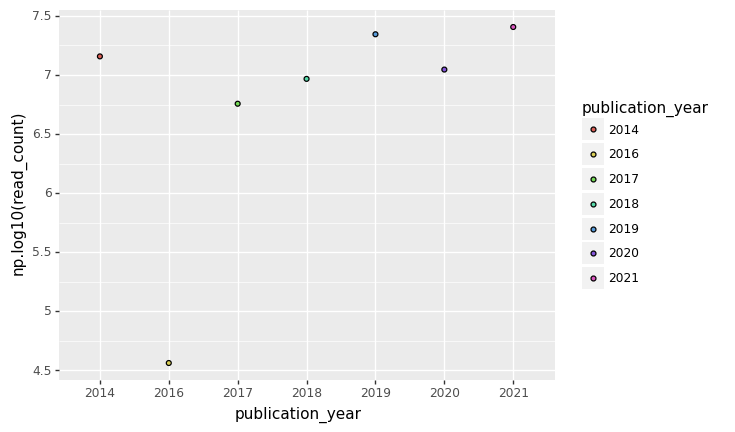

<ggplot: (369518181)>

In [59]:
ggplot(avg_read_count_by_year, aes(x='publication_year', y='np.log10(read_count)', fill='publication_year')) + geom_point() 

## 11 - Bonus, dealing with ill-formatted columns

Sometimes, colums can contains entries which could be split in multiple columns, typically values separated by a comma.
In AncientMetagenomeDir, this is the case with the archive accession column.

Here is how we would solve it with pandas

In [60]:
sample_df.assign(archive_accession = sample_df.archive_accession.str.split(",")).explode('archive_accession')

,project_name,publication_year,publication_doi,site_name,latitude,longitude,geo_loc_name,sample_name,sample_host,sample_age,sample_age_doi,community_type,material,archive,archive_project,archive_accession
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,SRS473742
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,SRS473743
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,SRS473744
0,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,B61,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,SRS473745
1,Warinner2014,2014,10.1038/ng.2906,Dalheim,51.565,8.840,Germany,G12,Homo sapiens,900,10.1038/ng.2906,oral,dental calculus,SRA,PRJNA216965,SRS473747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Gertrude’s Church, Riga",56.958,24.121,Latvia,T9,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,ERS7283099
1058,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"Dom Square, Riga",56.949,24.104,Latvia,TZA3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,ERS7283100
1058,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"Dom Square, Riga",56.949,24.104,Latvia,TZA3,Homo sapiens,400,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,ERS7283101
1059,Kazarina2021b,2021,10.1016/j.jasrep.2021.103213,"St. Peter’s Church, Riga",56.947,24.109,Latvia,TZA4,Homo sapiens,500,10.1016/j.jasrep.2021.103213,oral,tooth,ENA,PRJEB47251,ERS7283102
